Importación de librerías base para el problema 

In [35]:
import pandas as pd
import datetime as dt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import os


os.getcwd()


'c:\\Users\\shado\\OneDrive\\Escritorio\\Latam\\LATAM'

##### Esta sección del codigo hace que los graficos dinamicos de pyplot queden estaticos para las vista en github.

In [36]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

# 2.- Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :


#### Se inició por la segunda parte antes que el primer punto, ya que también analizare las variables agregadas externas al dataframe, por esta razón el punto 1 y 3 de análisis se estarán más abajo.

#### Lectura de datos principal y creacion de copia auxiliar de de la data original, también se busco información extra sobre países de los destinos de vuelos y los días feriados de ese año para el origen de los vuelos

#### Lectura y creación de variables en el data frame 

In [37]:
datos = pd.read_csv("dataset_SCL.csv", sep=",")
datos_original = datos.copy()
paises =  pd.read_excel("Prefijo Paises.xlsx", sheet_name= 'Hoja2')
feriados =  pd.read_excel("Feriados.xlsx")
datos.columns


C:\Users\shado\AppData\Local\Temp\ipykernel_62624\200450372.py:1: DtypeWarning:

Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

#### Verificación de tipos de datos en el data frame

In [38]:
datos.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

transformanción de Fechas a formato tiempo

In [39]:
datos["Fecha-I"] = pd.to_datetime(datos["Fecha-I"])
datos["Fecha-O"] = pd.to_datetime(datos["Fecha-O"])
datos.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

creación de variables dif_min, hora_dia, hora, minutos

In [40]:
datos['dif_min'] = (datos["Fecha-O"]- datos["Fecha-I"])
datos['hora_dia'] = datos['Fecha-I'].dt.time
datos['hora'] = datos['Fecha-I'].dt.hour
datos['minutos'] = datos['Fecha-I'].dt.minute

datos.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,hora_dia,hora,minutos
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,0 days 00:03:00,23:30:00,23,30
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,0 days 00:09:00,23:30:00,23,30
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,0 days 00:09:00,23:30:00,23,30
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,0 days 00:03:00,23:30:00,23,30
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,-1 days +23:58:00,23:30:00,23,30


cambia la diferencia de las fechas de programación y salida de los vuelos a minutos.

In [41]:
datos["dif_min"] =  datos["dif_min"]/np.timedelta64(1,'m')

Homologación de variable Mes a nombre

In [42]:
conditions = [
    (datos['MES'] == 1),
    (datos['MES'] == 2),
    (datos['MES'] == 3),
    (datos['MES'] == 4),
    (datos['MES'] == 5),
    (datos['MES'] == 6),
    (datos['MES'] == 7),
    (datos['MES'] == 8),
    (datos['MES'] == 9),
    (datos['MES'] == 10),
    (datos['MES'] == 11),
    (datos['MES'] == 12)]
values = [
    'Enero',
    'Febrero',
    'Marzo',
    'Abril',
    'Mayo',
    'Junio',
    'Julio',
    'Agosto',
    'Septiembre',
    'Octubre',
    'Noviembre',
    'Diciembre']
datos['Mes_Nombre'] = np.select(conditions, values)
datos.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,hora_dia,hora,minutos,Mes_Nombre
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,3.0,23:30:00,23,30,Enero
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,9.0,23:30:00,23,30,Enero
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,9.0,23:30:00,23,30,Enero
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,3.0,23:30:00,23,30,Enero
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,-2.0,23:30:00,23,30,Enero


Verificación que los valores esten correctos

In [43]:
datos[["dif_min","Fecha-O","Fecha-I"]]

,dif_min,Fecha-O,Fecha-I
0,3.0,2017-01-01 23:33:00,2017-01-01 23:30:00
1,9.0,2017-01-02 23:39:00,2017-01-02 23:30:00
2,9.0,2017-01-03 23:39:00,2017-01-03 23:30:00
3,3.0,2017-01-04 23:33:00,2017-01-04 23:30:00
4,-2.0,2017-01-05 23:28:00,2017-01-05 23:30:00
...,...,...,...
68201,46.0,2017-12-22 15:41:00,2017-12-22 14:55:00
68202,16.0,2017-12-25 15:11:00,2017-12-25 14:55:00
68203,40.0,2017-12-27 15:35:00,2017-12-27 14:55:00
68204,13.0,2017-12-29 15:08:00,2017-12-29 14:55:00


Creación de variable temporada_alta y atraso_15

In [44]:
datos['temporada_alta'] = np.where(  ((datos['Fecha-I']>='2017-12-15') & (datos['Fecha-I']<='2018-03-03')) 
                                   | ((datos['Fecha-I']>='2017-07-15') & (datos['Fecha-I']<='2017-07-31'))
                                   | ((datos['Fecha-I']>='2017-01-01') & (datos['Fecha-I']<='2017-03-03'))
                                   | ((datos['Fecha-I']>='2017-09-11') & (datos['Fecha-I']<='2017-09-30'))
                                   ,1,0)
datos['atraso_15'] = np.where(datos['dif_min']>15,1,0)

#### creacion de variable periodo_dia

In [45]:
conditions = [
    (datos['hora'] >= 5) & (datos['hora'] < 12),
    (datos['hora'] >= 12) & (datos['hora'] < 19),
    (datos['hora'] >= 19) | ((datos['hora'] >= 0) & (datos['hora'] < 5))]
values = ['mañana', 'tarde', 'noche']
datos['periodo_dia'] = np.select(conditions, values)

##### Creación Variable Destino, la cual agrupa Destino de operación cuales tengan menos de 10 vuelos en categoria Otros

In [46]:
Destino_pre = datos.groupby(['Des-O']
                          #'OPERA',
                          #'MES',
                          #'DIA',
                          #'temporada_alta'
                        , dropna=False, as_index= False).agg(
    Cantidad_Vuelos = ('atraso_15','count'))


Destino_menores = Destino_pre[Destino_pre['Cantidad_Vuelos']<=10]

flex = Destino_menores['Des-O'].to_list() #agrega lista de destinos con menos de 10 vuelos
datos['Destino'] = np.where(datos['Des-O'].isin(flex), 'Otro',datos['Des-O']) #Creación de variable Destino donde se agrupan los DES-O con menos de 10 vuelos en categoria Otros

#### Creación de variable País

In [47]:

paises['Des-O_2'] = paises['Código prefijo']
paises['Largo'] = paises['Des-O_2'].str.len()

paises_1 = paises[paises['Largo'] == 1]
paises_2 = paises[paises['Largo'] == 2]

def subs(x):
    return x[:2]
datos['Des-O_2'] = datos['Des-O'].apply(subs)
datos['Des-O_2']
paises_2 = paises_2.drop(columns=['Largo','Código prefijo'], axis=1)
paises_1 = paises_1.drop(columns=['Largo','Código prefijo'], axis=1)

##### se crean dos set de datos uno con los paises de prefijo largo 1 y otro con los paises de prefijo largo 2, se trabajan por separado y luego se juntan solo en el data frame de datos.

In [48]:
datos_test = datos.merge(paises_2, how='left', left_on='Des-O_2', right_on = 'Des-O_2')
datos_1 = datos_test[datos_test['País'].isnull()]
datos_2 = datos_test[datos_test['País'].notnull()]

datos_1 =  datos_1.drop(columns=[ 'País', ], axis=1)

def subs(x):
    return x[:1]
datos_1['Des-O_2'] = datos_1['Des-O'].apply(subs)
datos_1['Des-O_2']

datos_1 = datos_1.merge(paises_1, how='left', left_on='Des-O_2', right_on = 'Des-O_2')
datos_test = pd.concat([datos_1, datos_2], axis = 0)

datos_test =  datos_test.drop(columns=['LARGO_x','LARGO_y', 'LARGO'], axis=1)

datos_test =  datos_test.drop(columns=[ 'Des-O_2', ], axis=1)
datos_test


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,dif_min,hora_dia,hora,minutos,Mes_Nombre,temporada_alta,atraso_15,periodo_dia,Destino,País
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,3.0,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,9.0,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,9.0,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,3.0,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,-2.0,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,46.0,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,16.0,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,40.0,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,13.0,14:55:00,14,55,Diciembre,1,0,tarde,SPJC,Perú


In [49]:
#### Creación de una variable con los dias Feriados en el data frame.

In [50]:
datos_test['Fecha-I'] = datos_test['Fecha-I'].dt.normalize()
datos_test = datos_test.merge(feriados, how='left', left_on='Fecha-I', right_on = 'Fecha-I')
datos_test['Feriado'] = np.where(datos_test['Feriado'].isnull(),'No Feriado','Feriado')
datos_test


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,hora_dia,hora,minutos,Mes_Nombre,temporada_alta,atraso_15,periodo_dia,Destino,País,Feriado
0,2017-01-01,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos,Feriado
1,2017-01-02,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos,No Feriado
2,2017-01-03,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos,No Feriado
3,2017-01-04,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos,No Feriado
4,2017-01-05,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,23:30:00,23,30,Enero,1,0,noche,KMIA,Estados contiguos de los Estados Unidos,No Feriado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú,No Feriado
68202,2017-12-25,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú,Feriado
68203,2017-12-27,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,14:55:00,14,55,Diciembre,1,1,tarde,SPJC,Perú,No Feriado
68204,2017-12-29,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,14:55:00,14,55,Diciembre,1,0,tarde,SPJC,Perú,No Feriado


#### exportación de archivo csv con las variables creadas desde el dataframe

In [51]:
synthetic_features = datos_test[[
            'temporada_alta'
            ,'dif_min'
            ,'atraso_15'
            ,'periodo_dia'
            ,'Destino'
            ,'País'
            ,'Feriado'
            ]]

synthetic_features.to_csv("synthetic_features.csv"
                          , sep="|"
                          , header=True
                          , index=False)

# 1.- ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

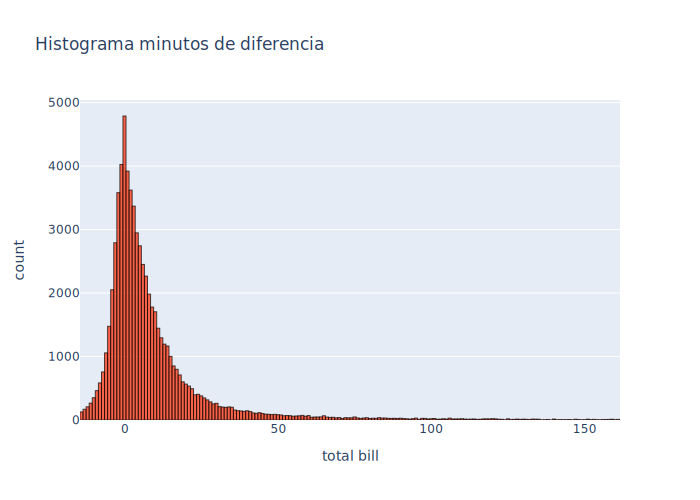

In [52]:
hist_min_dif = px.histogram(datos_test, x="dif_min",
                   title='Histograma minutos de diferencia',
                   labels={'dif_min':'total bill'}, 
                   opacity=0.7,
                   color_discrete_sequence=['#FF2800'] 
                   )
hist_min_dif.update_traces(marker_line_width = 1
                  ,marker_line_color = 'black')


hist_min_dif.show()

#### Vamos a verificar distribución de la variable Minutos de diferencia entre la programación del vuelo y la salida de este. observamos que la data se encuentra cargada a la izquierda con valores negativos, lo que nos dice que existen algunos vuelos que salen antes de lo programado. Para nuestro ejemplo nos centraremos en analizar los datos que presentan atrasos ya que es la variable que intentaremos predecir posteriormente.

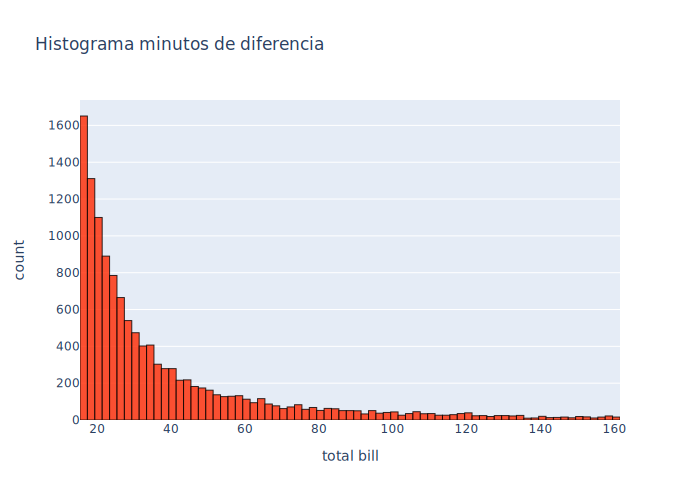

In [53]:

atrasos = datos[datos['atraso_15']==1] #filtro para ver histograma solo de vuelos con atrasos


fig = px.histogram(atrasos
                   , x="dif_min"
                   ,title='Histograma minutos de diferencia'
                   ,labels={'dif_min':'total bill'}
                   ,opacity=0.8
                   ,color_discrete_sequence=['#FF2800'] )

fig.update_traces(marker_line_width = 1
                  ,marker_line_color = 'black')
fig.show()

#### Aquí se observa una figura muy parecida a los que es un gráfico de una variable exponencial, verificaremos como se porta una variable exponencial teórica con parámetro lambda usando el estimador de máxima verosimilitud de la muestra.

# 3.-   ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
#       ¿Qué variables esperarías que más influyeran en predecir atrasos?


### En la siguiente sección se entregaran diversas estadísticas descriptivas y análisis de datos para ir respondiendo esta consulta.

### Calculo de tasa de atrasos de la base total y  Gráfico tasa de atrasos en la data completa

   atraso_15  Cantidad_Vuelos  Tasa de atrasos
0  No Atraso            55592        81.509611
1     Atraso            12614        18.494788


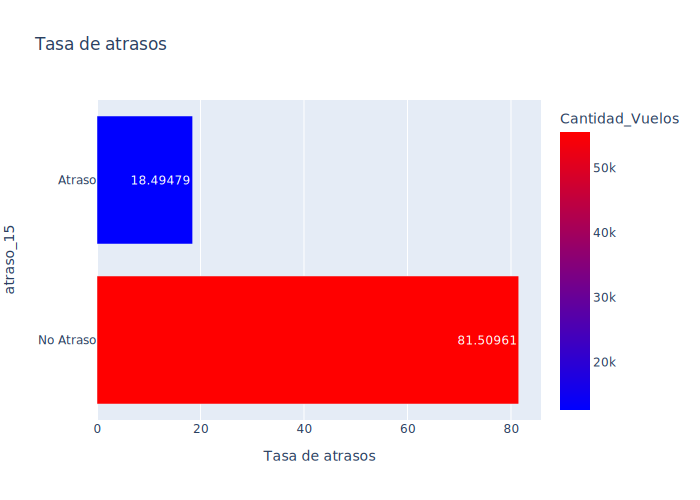

In [54]:
Tasa_atrasos = datos_test.groupby(['atraso_15']
                         # 'Des-O'
                          #'OPERA',
                          #'MES',
                          #'DIA',
                          #'temporada_alta'
                        , dropna=False,as_index=False).agg(
    Cantidad_Vuelos = ('atraso_15','count'))
Tasa_atrasos['Tasa de atrasos'] = (Tasa_atrasos['Cantidad_Vuelos']/68203)*100


def f(row):
    if row == 0:
        val = 'No Atraso'
    else:
        val = 'Atraso'
    return val
Tasa_atrasos['atraso_15'] = Tasa_atrasos['atraso_15'].apply(f)
print(Tasa_atrasos)

fig = px.bar(Tasa_atrasos
             , y ='atraso_15'
             , x ='Tasa de atrasos'
             , color_continuous_scale= 'Bluered'
             , color='Cantidad_Vuelos'
             , orientation= 'h'
             , title = 'Tasa de atrasos'
             , text_auto = True
             )
fig.show()


### Se observa que el 18.49% de los vuelos generales presentan atrasos

### Calculo de tasa de atrasos por Destino, se toma en cuenta para esta tasa destinos mayores o iguales a 10 vuelos para la variable Destino de Operacion Des-O  

In [55]:
Destino_pre = datos.groupby(['Des-O']
                          #'OPERA',
                          #'MES',
                          #'DIA',
                          #'temporada_alta'
                        , dropna=False, as_index= False).agg(
    Cantidad_Vuelos = ('atraso_15','count'))


Destino_menores = Destino_pre[Destino_pre['Cantidad_Vuelos']<=10]

flex = Destino_menores['Des-O'].to_list() #agrega lista de destinos con menos de 10 vuelos
datos['Destino'] = np.where(datos['Des-O'].isin(flex), 'Otro',datos['Des-O']) #Creación de variable Destino donde se agrupan los DES-O con menos de 10 vuelos en categoria Otros


### Calculo de tasa de atrasos por Destino

In [56]:
Destino = datos_test.groupby(['Destino']
                          #'OPERA',
                          #'MES',
                          #'DIA',
                          #'temporada_alta'
                        ,as_index=False, dropna=False).agg(
    Cantidad_Vuelos = ('atraso_15','count'),
    Cantidad_Atrasos = ('atraso_15','sum'))
                        
Destino['Tasa de atrasos'] = Destino['Cantidad_Atrasos']/Destino['Cantidad_Vuelos']*100 #Calculo tasa de atrasos
                       
Destino[Destino['Cantidad_Vuelos']>10].sort_values('Tasa de atrasos',ascending=False).head(10)
Destino_mayores = Destino[Destino['Cantidad_Vuelos']>10].sort_values('Tasa de atrasos',ascending=False)
Destino.sort_values('Tasa de atrasos',ascending=False)


,Destino,Cantidad_Vuelos,Cantidad_Atrasos,Tasa de atrasos
53,YSSY,194,113,58.247423
52,YMML,39,21,53.846154
17,Otro,25,10,40.000000
18,SAAR,136,54,39.705882
16,NZAA,361,135,37.396122
12,MDPC,54,18,33.333333
0,CYYZ,283,89,31.448763
20,SACO,1023,308,30.107527
46,SGAS,232,66,28.448276
27,SBGL,1435,405,28.222997


### Se observa que de los Destinos de operación posibles el que presenta mayor tasa de atrasos es el de YSSY  y YMML ambos en Australia

### Grafíco de la tasa de atrasos por Destino

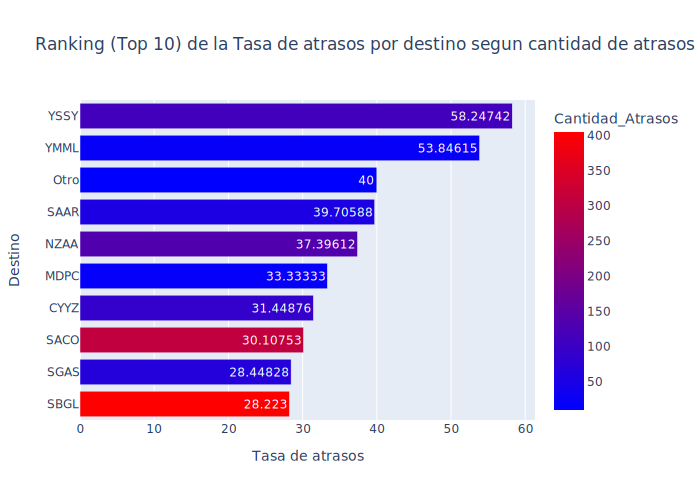

In [57]:
fig = px.bar(Destino_mayores.head(10).sort_values('Tasa de atrasos',ascending=True)
             , y ='Destino'
             , x ='Tasa de atrasos'
             , color_continuous_scale= 'Bluered'
             , color='Cantidad_Atrasos'
             , orientation= 'h'
             , title = 'Ranking (Top 10) de la Tasa de atrasos por destino segun cantidad de atrasos'
             , text_auto= True
             )
fig.show()

#### Gráfico de tasa de atrasos segun Destino (Top 10)

#### ¿es posible saber si Australia es el pais de destino con mayor tasa de atrasos?. Para responder esto usaremos los datos extraidos de  codificacion  Organización de Aviación Civil Internacional "OACI"

In [58]:
Pais = datos_test.groupby([
                          #'Des-O'
                          #'OPERA',
                          #'MES',
                          #'DIA',
                          'País'
                        ], dropna=False, as_index=False).agg(
    Cantidad_vuelos = ('atraso_15','count'),
    Cantidad_atrasos = ('atraso_15','sum')
                                            )

Pais['Tasa de atrasos'] = (Pais['Cantidad_atrasos']/Pais['Cantidad_vuelos'])*100

Pais = Pais.sort_values('Tasa de atrasos',ascending=False)
Pais



,País,Cantidad_vuelos,Cantidad_atrasos,Tasa de atrasos
1,Australia,233,134,57.510730
13,Nueva Zelanda,361,135,37.396122
18,República Dominicana,54,18,33.333333
4,Canadá,283,89,31.448763
15,Paraguay,232,66,28.448276
0,Argentina,9237,2452,26.545415
6,Colombia,1604,415,25.872818
3,"Brasil (también SD, SN, SS y SW)",5171,1316,25.449623
16,Perú,5271,1214,23.031683
19,Uruguay,1072,221,20.615672


#### Calculamos la tasa de atraso por Pais de destino y podemos obsersvar que efevtivamente Australia es el pais que presenta la mayor tasa de atrasos en los viajes. 

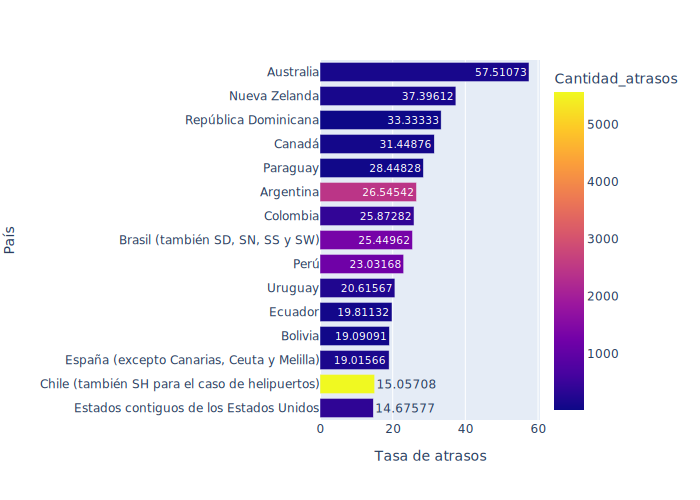

In [59]:
fig = px.bar(Pais.head(15).sort_values('Tasa de atrasos',ascending=True)
            , y='País'
            , x='Tasa de atrasos'
            , color='Cantidad_atrasos'
            , text_auto= True
            )


fig.show()

#### Se muestran el top 10 de las tasas de atrasos por País.